# Scenerio Testing BHC Module

### Test Scenerios:

1) Simulated data clusters: Three component Gaussian mixture

2) Real data set presented in BHC paper: Glass data set

In [71]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import linalg as la
from scipy import random as rnd
from scipy.special import gamma
import matplotlib.pyplot as plt

import bhc

### Data Sets

**Three component Gaussian mixture:**

In [17]:
# bivariate gaussian params
mu1 = np.zeros(2)
cov1 = np.eye(2)

mu2 = np.array([5, 3])
cov2 = np.eye(2) * 2

mu3 = np.array([8, 12])
cov3 = np.array([3.4, 0, 0, 5.1]).reshape(2, 2)

# multinom params
p1 = 0.4 #0.3
p2 = 0 #0.4
p3 = 1 - p2 - p1

# number of total draws
draws = 100

In [18]:
# random draws
rnd.seed(1)

knum = rnd.multinomial(draws, (p1, p2, p3))

gaus1 = rnd.multivariate_normal(mu1, cov1, knum[0])
gaus2 = rnd.multivariate_normal(mu2, cov2, knum[1])
gaus3 = rnd.multivariate_normal(mu3, cov3, knum[2])

# join columns into dataframe
x1 = pd.Series(np.r_[gaus1[:, 0], gaus2[:, 0], gaus3[:, 0]])
x2 = pd.Series(np.r_[gaus1[:, 1], gaus2[:, 1], gaus3[:, 1]])
c = pd.Series(np.r_[np.zeros(knum[0]), np.ones(knum[1]), np.ones(knum[2]) * 2])
dat = {"x1" : x1, "x2" : x2, "c" : c}
clustData = pd.DataFrame(dat)

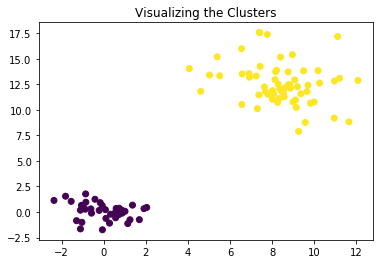

In [19]:
plt.scatter(clustData["x1"], clustData["x2"], c = clustData["c"])
plt.title("Visualizing the Clusters")
plt.show()

In [111]:
# priors distribution hyper-parameters
gcPriors = {
    "clusterConcentrationPrior" : {"alpha" : 2},
    "diffuseInvWishPrior" : {"df" : 10, "scale" : 10*np.eye(2)}, # inv wishart params
    "diffuseNormPrior" : {"loc" : np.array([1,0]),
                          "scale" : np.eye(2),
                          "meanscale" : 1}, # mvtnormal params
}

In [94]:
np.array([17,50])

array([17, 50])

In [49]:
clustData.mean(axis=0)[:-1]

x1    5.211736
x2    7.824285
dtype: float64

In [112]:
gc = np.array([[1.1,0.1],[1,0]])#clustData.values[:, :2]
gctree = bhc.HierarchyTree(X = gc, allParams = gcPriors)

In [113]:
gctree.grow_tree()

0.0005382539270746473


In [9]:
gctree.prune_tree()

In [26]:
gctree.tree_summary()

Summary for tier 0:
-------------------------------
Number of clusters: 100
  Cluster 0 size: 1
	 Posterior merge probability: 1.0
  Cluster 1 size: 1
	 Posterior merge probability: 1.0
  Cluster 2 size: 1
	 Posterior merge probability: 1.0
  Cluster 3 size: 1
	 Posterior merge probability: 1.0
  Cluster 4 size: 1
	 Posterior merge probability: 1.0
  Cluster 5 size: 1
	 Posterior merge probability: 1.0
  Cluster 6 size: 1
	 Posterior merge probability: 1.0
  Cluster 7 size: 1
	 Posterior merge probability: 1.0
  Cluster 8 size: 1
	 Posterior merge probability: 1.0
  Cluster 9 size: 1
	 Posterior merge probability: 1.0
  Cluster 10 size: 1
	 Posterior merge probability: 1.0
  Cluster 11 size: 1
	 Posterior merge probability: 1.0
  Cluster 12 size: 1
	 Posterior merge probability: 1.0
  Cluster 13 size: 1
	 Posterior merge probability: 1.0
  Cluster 14 size: 1
	 Posterior merge probability: 1.0
  Cluster 15 size: 1
	 Posterior merge probability: 1.0
  Cluster 16 size: 1
	 Posterior merge

In [79]:
gctree.tree[9][(((((70, 79), (35, 93)), ((46, 52), (86, 94))),
   (((39, 63), (1, 33)), ((42, 61), (64, 98)))),
  (((((38, 53), (50, 67)), ((41, 72), (55, 71))),
    (((77, 99), (44, 74)), ((43, 97), (84, 90)))),
   (((((47, 48), (66, 85)), ((45, 73), (57, 92))),
     (((59, 65), (62, 76)), (((58, 89), (3, 19)), ((80, 82), (9, 87))))),
    (((((8, 56), (21, 24)), ((49, 51), (10, 15))),
      (((2, 83), (14, 78)), ((91, 95), (25, 40)))),
     (((((26, 30), (6, 13)), ((11, 81), (20, 69))),
       (((28, 88), (0, 7)), ((34, 96), (22, 27)))),
      ((((23, 32), (16, 54)), ((18, 36), (12, 37))),
       (((29, 60), (5, 31)),
        ((4, 68), (17, 75)))))))))].left.pi

0.9999413636654959

In [76]:
gamma(100)*2

1.8665243088788834e+156

In [55]:
print(gc[40, :])
print(gc[58, :])
for k, v in gctree.tree[1].items():
    print(k)
    print(v.postMergProb, "\n")

[ 8.33387182 11.09832552]
[ 8.57300249 11.26786761]
(26, 30)
1.2339756645926047e-22 

(6, 13)
9.084355232910123e-23 

(11, 81)
6.702607895587366e-23 

(20, 69)
5.436081552951892e-23 

(28, 88)
4.2052815100624553e-23 

(34, 96)
3.728061303831739e-23 

(0, 7)
1.9445771183440283e-23 

(22, 27)
1.7208854659411966e-23 

(23, 32)
1.5850848973816658e-23 

(16, 54)
9.98798077468593e-24 

(18, 36)
3.6435471316667216e-24 

(12, 37)
2.621256876032782e-24 

(29, 60)
1.6053660376832792e-24 

(5, 31)
9.0315282209708e-25 

(4, 68)
2.9444021639549236e-25 

(49, 51)
2.35175256063194e-25 

(17, 75)
2.1201152964324764e-25 

(8, 56)
1.259103396084631e-25 

(21, 24)
7.563891912942291e-26 

(2, 83)
5.47773935575002e-26 

(14, 78)
3.9208907413963056e-26 

(10, 15)
2.910211495773969e-26 

(91, 95)
1.86708008046207e-26 

(58, 89)
6.424902423632706e-27 

(25, 40)
4.797341691338147e-27 

(80, 82)
2.3609018103531973e-27 

(9, 87)
2.0233445997183003e-27 

(70, 79)
1.5658075073312677e-27 

(3, 19)
9.708328621081265

In [16]:
la.norm(gc[2,:] - gc[58,:], ord=2)

4.912796108273658

In [14]:
la.norm(gc[2,:] - gc[77,:], ord=2)

5.0556123491714775

In [15]:
la.norm(gc[22,:] - gc[45,:], ord=2)

1.266871900391158

**Glass Data Set:**

In [ ]:
glassurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
glasshead = ["ID", "RI", "Na", "Mg", "Al", "Si",
             "K", "Ca", "Ba", "Fe", "Type"]
glass = pd.read_csv(glassurl, names = glasshead, index_col = 0)
glass.head()

In [ ]:
fig, ax = plt.subplots(ncols = 3)
ax[0].scatter(glass["Al"], glass["RI"], c = glass["Type"])
ax[0].set_title("Al & RI")
ax[1].scatter(glass["Si"], glass["Na"], c = glass["Type"])
ax[1].set_title("Si & Na")
ax[2].scatter(glass["Al"], glass["Ca"], c = glass["Type"])
ax[2].set_title("Al & Ca")
plt.show()

**Data Set 3**